Ciclo: 1
Pesos v: [0.29488376 0.28158709]
Peso v0: [0.15627052]
Saídas finais do Perceptron:
[[ 1.]
 [ 1.]
 [ 1.]
 [-1.]]


C:\Users\Robert Fernandes\AppData\Local\Temp\ipykernel_4940\3921705762.py:67: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  vy[i] = -(v0 + v[0] * vx[i]) / v[1]


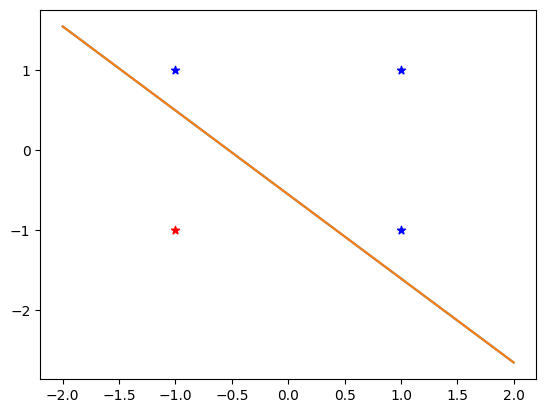

In [24]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

# Definição dos dados de entrada e saída
x = np.array([[1.0, 1.0], [1.0, -1.0], [-1.0, 1.0], [-1.0, -1.0]])
t = np.array([[1.0], [1.0], [1.0], [-1.0]])  # Saídas esperadas

limiar = 0.0
alfa = 0.1  # Taxa de aprendizado

(amostras, entradas) = np.shape(x)

# Inicialização dos pesos com valores aleatórios pequenos
v = np.random.uniform(-0.5, 0.5, (entradas, 1))
v0 = rd.uniform(-0.5, 0.5)

ciclo = 0
test = 1

# Algoritmo do Perceptron
while test == 1:
    cont = 0  # Contador de acertos
    for i in range(amostras):
        # Cálculo do potencial de ativação
        yin = np.dot(x[i, :], v) + v0

        # Função de ativação (limiar)
        if yin >= limiar:
            y = 1.0
        else:
            y = -1.0

        # Verifica se a saída está correta
        if y == t[i]:
            cont += 1

        # Atualização dos pesos se houver erro
        v += alfa * (t[i] - y) * x[i, :].reshape(-1, 1)
        v0 += alfa * (t[i] - y)

    ciclo += 1
    print('Ciclo:', ciclo)

    # Se todas as amostras estiverem corretas, encerra o treinamento
    if cont == amostras:
        test = 0

# Exibe os pesos finais
print('Pesos v:', v.flatten())
print('Peso v0:', v0)

# Testa a rede com os valores finais
test = np.dot(x, v)
yfinal = np.sign(test + v0)

print("Saídas finais do Perceptron:")
print(yfinal)

# Plotagem da fronteira de decisão
vx = np.linspace(-2, 2, 100)
vy = np.zeros(100)

# Evita divisão por zero na equação da reta
if v[1] != 0:
    for i in range(100):
        vy[i] = -(v0 + v[0] * vx[i]) / v[1]
    plt.plot(vx, vy, label="Fronteira de decisão")

# Plotagem dos pontos
plt.plot(vx,vy)
plt.scatter(1, 1, marker="*", color='blue')
plt.scatter(1, -1, marker="*", color='blue')
plt.scatter(-1, 1, marker="*", color='blue')
plt.scatter(-1, -1, marker="*", color='red')
